In [36]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse = "C:/LearnPython/mouse_drug_data.csv"
clinical = "C:/LearnPython/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse)
clinical = pd.read_csv(clinical)

# Combine the data into a single dataset
merged = pd.merge(mouse, clinical, on="Mouse ID")

# Display the data table for preview
merged.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [37]:
#Reduce data frame to 4 named drugs
mts = merged[(merged.Drug == 'Capomulin') |
                     (merged.Drug == 'Infubinol') | 
                     (merged.Drug == 'Ketapril') | 
                     (merged.Drug == 'Placebo')]

mts_df = pd.DataFrame(mts)
mts_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


In [38]:
mts_df['DrugTimepoint'] = mts_df['Drug'] + ','+ mts_df['Timepoint'].astype(str) 
mts_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,DrugTimepoint
393,q119,Ketapril,0,45.000000,0,"Ketapril,0"
394,q119,Ketapril,5,47.864440,0,"Ketapril,5"
395,q119,Ketapril,10,51.236606,0,"Ketapril,10"
396,n923,Ketapril,0,45.000000,0,"Ketapril,0"
397,n923,Ketapril,5,45.824881,0,"Ketapril,5"


## Tumor Response to Treatment

In [39]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean = mts_df['Tumor Volume (mm3)'].groupby([mts_df['Drug'],mts_df['Timepoint']]).mean()

mean= mean.unstack(level = 0)
mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [40]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem = mts['Tumor Volume (mm3)'].groupby([mts['Drug'],mts['Timepoint']]).sem()
sem = sem.unstack(level = 0)
sem

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


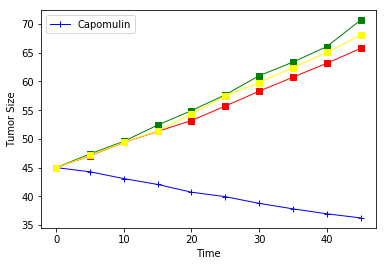

In [57]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)

cap = mean['Capomulin']
inf = mean['Infubinol']
ket = mean['Ketapril']
pla = mean['Placebo']

capomulin, = plt.plot(x_axis, cap, marker="+",color="blue", linewidth=1, label="Capomulin")
infubinol, = plt.plot(x_axis, inf, marker="s", color="Red", linewidth=1, label="Infubinol")
ketapril, = plt.plot(x_axis, ket, marker="s", color="green", linewidth=1, label="Ketapril")
placebo, = plt.plot(x_axis, pla, marker="s", color="yellow", linewidth=1, label="Placebo")

plt.legend(handles=[capomulin], loc="best")

plt.xlabel('Time')
plt.ylabel('Tumor Size')

plt.show()

# Save the Figure

In [58]:
# Show the Figure
plt.show()

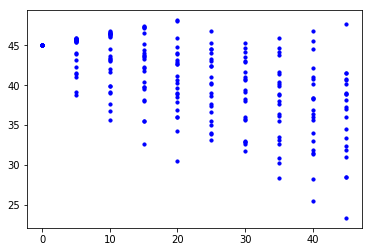

In [59]:
cap = merged[(merged.Drug == 'Capomulin')]
x = mts_cap['Timepoint'] 
ycap = cap['Tumor Volume (mm3)']

ax1 = plt.scatter(x,ycap,label='scatter graph',color='blue',s=10)


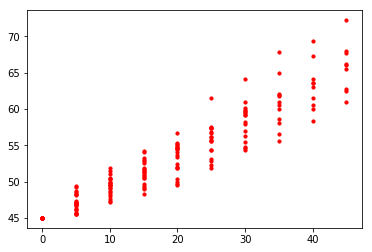

In [60]:
inf = merged[(merged.Drug =='Infubinol')]
x = inf['Timepoint'] 
yinf = inf['Tumor Volume (mm3)']

ax2 = plt.scatter(x,yinf,label='scatter graph',color='red',s=10,ax=ax1)

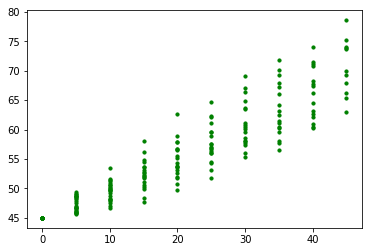

In [61]:
ket = merged[(merged.Drug =='Ketapril')]
x = ket['Timepoint'] 
yket = ket['Tumor Volume (mm3)']

ax3 = plt.scatter(x,yket,label='scatter graph',color='green',s=10,ax=ax1)

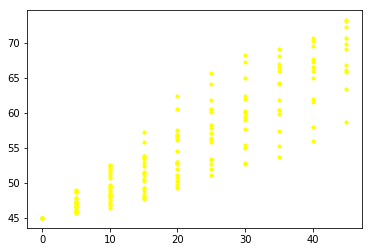

In [64]:
pla = merged[(merged.Drug =='Placebo')]
x = pla['Timepoint'] 
ypla = pla['Tumor Volume (mm3)']

ax4 = plt.scatter(x,ypla,label='scatter graph',color='yellow',s=10)

In [65]:
print(ax1 == ax2 == ax3)

False


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(100, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])


ax1 = df.plot(kind='scatter', x='a', y='b', color='r')    
ax2 = df.plot(kind='scatter', x='c', y='d', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='e', y='f', color='b', ax=ax1)

print(ax1 == ax2 == ax3)  # True

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_ms = mts['Metastatic Sites'].groupby([mts['Drug'],mts['Timepoint']]).mean()
mean_ms = mean_ms.unstack(level = 0)
mean_ms


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_ms = mts['Metastatic Sites'].groupby([mts['Drug'],mts['Timepoint']]).sem()
sem_ms = sem_ms.unstack(level = 0)
sem_ms


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


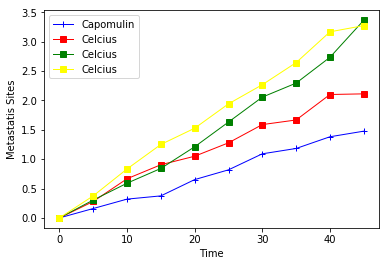

In [12]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)

cap = mean_ms['Capomulin']
inf = mean_ms['Infubinol']
ket = mean_ms['Ketapril']
pla = mean_ms['Placebo']

capomulin_ms, = plt.plot(x_axis, cap, marker="+",color="blue", linewidth=1, label="Capomulin")
infubinol_ms, = plt.plot(x_axis, inf, marker="s", color="Red", linewidth=1, label="Celcius")
ketapril_ms, = plt.plot(x_axis, ket, marker="s", color="green", linewidth=1, label="Celcius")
placebo_ms, = plt.plot(x_axis, pla, marker="s", color="yellow", linewidth=1, label="Celcius")

plt.legend(handles=[capomulin_ms,infubinol_ms,ketapril_ms,placebo_ms], loc="best")

plt.xlabel('Time')
plt.ylabel('Metastatis Sites')

plt.show()

## Survival Rates

In [55]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count = mts['Metastatic Sites'].groupby([mts['Drug'],mts['Timepoint']]).count()

count = count.unstack(level = 0)
count


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

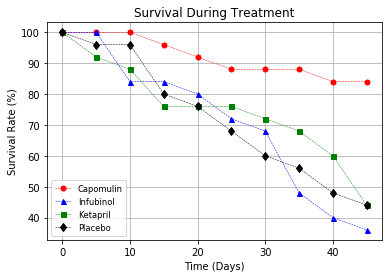

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

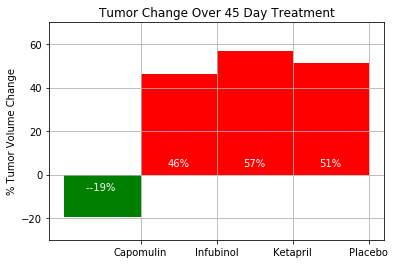